<h2>Data Structure</h2>

In [71]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
 
import csv
from pprint import pprint

In [72]:
class WineReview:
    def __init__(self, *argv):
        self.id = argv[0]
        self.country               = argv[1]
        self.description           = argv[2]
        self.designation           = argv[3]
        self.points                = self._get_number(argv[4])
        self.price                 = self._get_float(argv[5])
        self.province              = argv[6]
        self.region_1              = argv[7]
        self.region_2              = argv[8]
        self.taster_name           = argv[9]
        self.taster_twitter_handle = argv[10]
        self.title                 = argv[11]
        self.variety               = argv[12]
        self.winery                = argv[13]

    def show(self):
        pprint(vars(self))
        
    def _get_number(self, string):
        return int(string)
        
    def _get_float(self, string):
        f = float(string)
        if f == 0:
            print(f)
        return f
        

In [73]:
def load_reviews():
    f = open("wine-reviews/winemag-data-130k-v2.csv", 'rt')
    raw_data = list(csv.reader(f))
    columns = raw_data.pop(0)
    #print(columns)
    
    reviews = dict()
    errors = list()

    for row in raw_data:
        id = int(row[0])
        try:
            review = WineReview(*row)
            reviews[id] = review
        except ValueError as e:
            errors.append(id)   
    f.close()

    return reviews, errors

<h3>Dictionary with all WineReviews found in the .csv file and raw data<h3>

In [74]:
reviews, errors = load_reviews() 
total = len(errors)+len(reviews.keys())
p = (len(errors)/total)*100
print("--> cleaned type errors of {} out of {} records ({}%)".format(len(errors), total, round(p, 2)))


--> cleaned type errors of 8996 out of 129971 records (6.92%)


In [75]:
# remove price outliers
def reject_outliers(data, m=2):
    return data[abs(data - np.mean(data)) < m * np.std(data)]

X = collect_value('price')
print("with outliers: ", len(X))
X = reject_outliers(X)
print("without outliers: ", len(X))

reviews_wo_outliers = dict()

for k, v in reviews.items():
    
    if v.price not in X:
        continue
    reviews_wo_outliers[k] = v
        
print(len(reviews_wo_outliers.keys()))

with outliers:  118299
without outliers:  111691
111691


<h3>Attributes of a WineReview object</h3>

In [76]:
try: 
    reviews_wo_outliers[8].show()
except KeyError:
    print("erroneous data")

{'country': 'Germany',
 'description': 'Savory dried thyme notes accent sunnier flavors of preserved '
                "peach in this brisk, off-dry wine. It's fruity and fresh, "
                'with an elegant, sprightly footprint.',
 'designation': 'Shine',
 'id': '8',
 'points': 87,
 'price': 12.0,
 'province': 'Rheinhessen',
 'region_1': '',
 'region_2': '',
 'taster_name': 'Anna Lee C. Iijima',
 'taster_twitter_handle': '',
 'title': 'Heinz Eifel 2013 Shine Gewürztraminer (Rheinhessen)',
 'variety': 'Gewürztraminer',
 'winery': 'Heinz Eifel'}


<h2>Linear Regression</h2>

In [77]:
def collect_value(attribute):
    result = list()
    for k, v in reviews_wo_outliers.items():
        result.append(vars(v)[attribute])
    
    return np.array(result)
        
    

In [78]:
X = collect_value('price')
Y = collect_value('points')

# training and test separation
X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1, 1), Y, test_size=0.20)

print(X_train)
print(y_train)

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

w = model.coef_[0] # parameters of model
b = model.intercept_ #intercept of model

#mse = mean_squared_error(Y, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
#r2_score = model.score(X, Y)
r2_score = model.score(X_test, y_pred)

print("coeficient: ", w)
print("intercept: ", b)

print(mse)
print(r2_score)

[[38.]
 [28.]
 [25.]
 ...
 [15.]
 [26.]
 [20.]]
[90 87 88 ... 84 82 85]
coeficient:  0.10234531524447357
intercept:  85.23372902719363
5.950381429123788
1.0


/Users/roxana/.virtualenvs/dojo3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


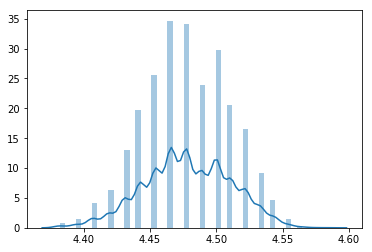

In [79]:
import seaborn as sns

sns.distplot(np.log(y_test))

71.0
4.0


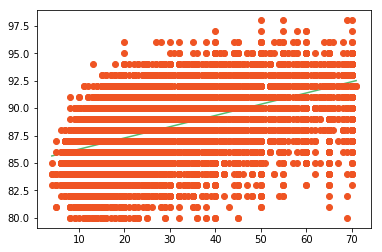

In [80]:
max_x = np.max(X_test)
min_x = np.min(X_test)

print(max_x)
print(min_x)

x = np.linspace(min_x, max_x, 1000)
y = b + w*x
plt.plot(x, y,'-', color="#58b970")
plt.plot(X_test, y_test,'o', color="#ef5423")

<h4>Using Pandas</h4>

In [81]:
data = pd.read_csv("wine-reviews/winemag-data-130k-v2.csv")
data.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


In [ ]:
x = data['points'].values
y = data['price'].values

# m = len(x)

# x = x.reshape(m, 1)
# model = LinearRegression()
# model.fit(x, y)

# y_pred = model.predict(x)


# mse = mean_squared_error(y, y_pred)
# rmse = np.sqrt(mse)
# r2_score = model.score(x, y)

# print(rmse)
# print(r2_score)

